In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers
from sklearn.model_selection import train_test_split
from keras.initializers import glorot_uniform  # Or your initializer of choice
import keras.backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
from keras import *
from keras.models import Sequential
from sklearn.model_selection import RepeatedKFold, cross_val_score
import sklearn
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_validate
from keras.layers import Input
from keras.layers import Dense
import kerastuner as kt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import plotly.express as px

C:\Users\lobo\AppData\Local\Temp\ipykernel_6556\2765108913.py:23: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


# Clasificar numeros

## importamos datos

In [53]:
X=np.load('data/X_MNIST_60_mil.npy', allow_pickle=True)
y=np.load('data/y_MNIST_60_mil.npy', allow_pickle=True)
X_new=np.load('data/X_MNIST_10_mil.npy', allow_pickle=True)
y = y.astype(np.uint8)   # algunos algoritmos dan error si los valores de y no son números

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.  The database is also widely used for training and testing in the field of machine learning. 

In [104]:
n=pd.DataFrame(X_new)
n

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_img=np.resize(X,(60000,28,28))
X_img.shape

(60000, 28, 28)

## show Datos

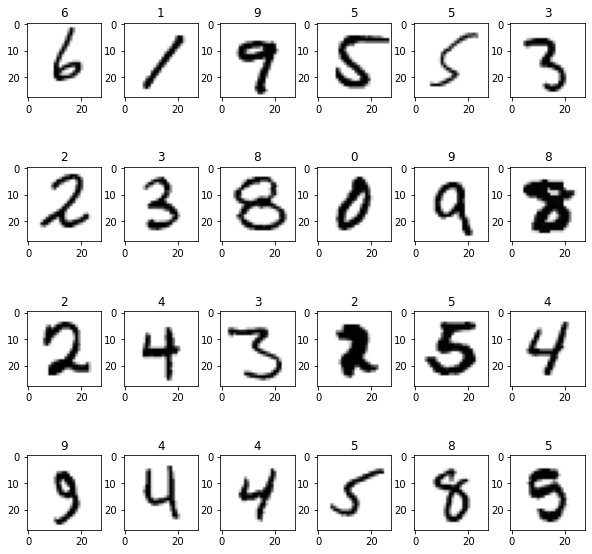

In [5]:
pos_inicial=500            # Seleccionar a partir de qué imagen queremos ver ésa y las  23 imágenes siguientes

plt.figure(figsize = (10,10))               # tamaño de todo el plot
plt.subplots_adjust(wspace=0.3, hspace=0.3) # para ajustar los espaciados entre cada subplot, como % del total

for i in range(0,24):
    # cargamos la imagen en cada subplot con imshow()
    plt.subplot(4,6,i+1)
    plt.imshow(X_img[pos_inicial+i], cmap='binary', vmin=0, vmax=255) 
    # Info sobre los mapas de color cmap: https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html
    plt.title(y[pos_inicial+i])         # obtenemos la clase desde y_clases

plt.show()


El unico preprocesamiento que voy a hacer es Normalizar los datos

In [6]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [7]:
X = X / 255
X_new = X_new / 255

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_val_train,X_val_test,y_val_train,y_val_test=train_test_split(X_train,y_train,test_size=0.20,random_state=123)
  

## Test con hyperband

In [9]:
def crear_modelo(hp): 
    global modelo
    # arquitectura:
    modelo = Sequential()
    
    #cargamos la capa de entrada
    modelo.add(keras.layers.Flatten(input_shape= (784,), name= "Entrada"))
    
    # cargamos los valores de los hiperparámetros
    
    hp_initializer=hp.Choice('kernel_initializer',values=['uniform','glorot_uniform','random_uniform','variance_scaling','truncated_normal'])
    
    hp_activation= hp.Choice( 'activation', values=['elu','selu', 'relu', 'swish','sigmoid','softmax'])
    
    hp_optimizer=hp.Choice('optimizer', values=['sgd','adam','adadelta','Adamax','RMSprop','Nadam'])
    
    hp_neuronas_1=hp.Int(name='units_1',min_value=10,max_value=50, step=2)
    
    hp_neuronas_2=hp.Int(name='units_2',min_value=10,max_value=50, step=1)
    
    # Ahora vamos con las hidden layers
    modelo.add( keras.layers.Dense(units=hp_neuronas_1, kernel_initializer= hp_initializer, activation= hp_activation ))
    
    modelo.add( keras.layers.Dense(units=hp_neuronas_2, kernel_initializer= hp_initializer ,  activation= hp_activation ))
    
    # Capa de salida: observe que en la capa de salida pasamos el valor fijo de 'sigmoid' para activacion
    modelo.add( keras.layers.Dense(units=len(np.unique(y_train)), kernel_initializer= hp_initializer , activation="softmax", name="Salida" )) 
    
    # compilación:
    modelo.compile(loss="sparse_categorical_crossentropy" , optimizer= hp_optimizer , metrics=[ 'accuracy' ])

    return modelo

In [10]:
tuner=kt.Hyperband(crear_modelo,
                     objective = 'val_accuracy', 
                     max_epochs = 50,
                     factor = 10,
                     directory = 'salida-hyperband',
                     project_name = 'MNIST_05')  # OJO CAMBIAR NOMBRE DE ARCHIVO EN CADA CORRIDA

# Nota: los directorios y project_name los crea automáticamente, 
# PERO CUIDAR QUE EL NOMBRE DEL ARCHIVO NO EXISTA PREVIAMENTE

INFO:tensorflow:Reloading Oracle from existing project salida-hyperband\MNIST_05\oracle.json
INFO:tensorflow:Reloading Tuner from salida-hyperband\MNIST_05\tuner0.json


In [11]:
 class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

In [12]:
 tuner.search(X_train, y_train, epochs = 50
             ,validation_data = (X_test, y_test)) 
             #,callbacks = [ClearTrainingOutput()])

Trial 131 Complete [00h 06m 32s]
val_accuracy: 0.981333315372467

Best val_accuracy So Far: 0.9828333258628845
Total elapsed time: 00h 10m 15s
INFO:tensorflow:Oracle triggered exit


In [13]:
mejores_hiperparametros = tuner.get_best_hyperparameters(num_trials = 1)[0]

In [14]:
mejores_hiperparametros.get('kernel_initializer')

'random_uniform'

In [15]:
mejores_hiperparametros.get('activation')

'relu'

In [16]:
mejores_hiperparametros.get('optimizer')  

'Nadam'

In [17]:
mejores_hiperparametros.get('units_1')

402

In [18]:
mejores_hiperparametros.get('units_2')

403

keras.layers.Flatten sirve para poner una fila al lado de la otra para poder pasarlo por la red neurobal ya que en forma matricial no se podria

Ahora volvemos a crean rnn pero con los mejores hiperparametros

In [23]:
modelo1 = tuner.hypermodel.build(mejores_hiperparametros)
modelo1.fit(X_train, y_train, epochs = 50, 
             validation_data = (X_test, y_test))

Epoch 1/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2152 - accuracy: 0.9351 - val_loss: 0.1158 - val_accuracy: 0.9672
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0870 - accuracy: 0.9722 - val_loss: 0.1000 - val_accuracy: 0.9707
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0581 - accuracy: 0.9809 - val_loss: 0.0940 - val_accuracy: 0.9735
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.1073 - val_accuracy: 0.9717
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0360 - accuracy: 0.9880 - val_loss: 0.0969 - val_accuracy: 0.9737
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.1085 - val_accuracy: 0.9761
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0939 - val_accuracy

## Lo que se espera en la vida real

In [31]:
history= pd.DataFrame(modelo1.history.history)
array_history2=np.array(history)

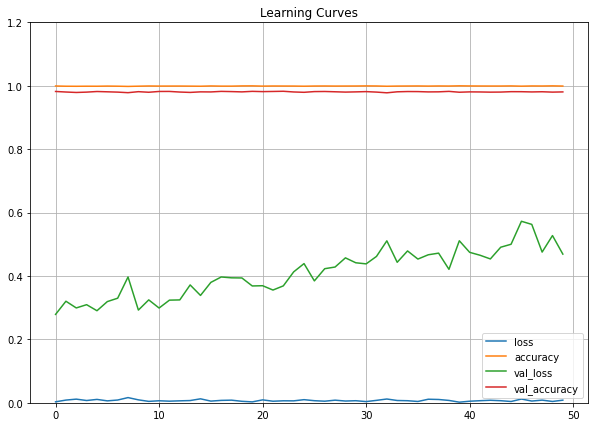

In [36]:
history.plot(figsize=(10, 7),grid=True, title="Learning Curves",ylim=(0,1.2));

## produccion

 Entrenamos con todos los datos

In [38]:
modelo1.fit(X,y,epochs=18)

Epoch 1/18
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0885 - accuracy: 0.9934
Epoch 2/18
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0152 - accuracy: 0.9971
Epoch 3/18
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0088 - accuracy: 0.9981
Epoch 4/18
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0115 - accuracy: 0.9980
Epoch 5/18
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0100 - accuracy: 0.9982
Epoch 6/18
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0083 - accuracy: 0.9984
Epoch 7/18
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0098 - accuracy: 0.9986
Epoch 8/18
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0085 - accuracy: 0.9985
Epoch 9/18
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0125 - accuracy: 0.9979
Epoch 10/18
1875/1875 [==============================] - 10s 5ms/step - l

guardamos el modelo

In [119]:
modelo1.save("mnist_trained_99.h5")

In [ ]:
#import joblib
#joblib.dump(modelo2,"rnn_minist.pkl")
 
#tf.saved_model.save(modelo2, "rnn")
#modelo2.save_weights("my_model.h5")